# Setup Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# navigasi ke folder
% cd /content/gdrive/My Drive/motogp_cnn

/content/gdrive/My Drive/motogp_cnn


In [ ]:
# cek
! pwd

/content/gdrive/MyDrive/motogp_cnn


# Eksplorasi Data

In [ ]:
import os

# eksplorasi direktori dataset
for dirpath, dirnames, filenames in os.walk("dataset_motogp"):
  print(f"Ada {len(dirnames)} folder dan {len(filenames)} gambar di direktori {dirpath}")

Ada 2 folder dan 0 gambar di direktori dataset_motogp
Ada 6 folder dan 0 gambar di direktori dataset_motogp/train
Ada 0 folder dan 70 gambar di direktori dataset_motogp/train/marquez
Ada 0 folder dan 70 gambar di direktori dataset_motogp/train/dovizioso
Ada 0 folder dan 75 gambar di direktori dataset_motogp/train/rossi
Ada 0 folder dan 65 gambar di direktori dataset_motogp/train/pedrosa
Ada 0 folder dan 66 gambar di direktori dataset_motogp/train/vinales
Ada 0 folder dan 76 gambar di direktori dataset_motogp/train/lorenzo
Ada 6 folder dan 0 gambar di direktori dataset_motogp/test
Ada 0 folder dan 8 gambar di direktori dataset_motogp/test/dovizioso
Ada 0 folder dan 9 gambar di direktori dataset_motogp/test/lorenzo
Ada 0 folder dan 9 gambar di direktori dataset_motogp/test/marquez
Ada 0 folder dan 9 gambar di direktori dataset_motogp/test/pedrosa
Ada 0 folder dan 9 gambar di direktori dataset_motogp/test/rossi
Ada 0 folder dan 9 gambar di direktori dataset_motogp/test/vinales


In [ ]:
# dapatkan label data
import pathlib
import numpy as np
data_dir = pathlib.Path("dataset_motogp/train")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['dovizioso' 'lorenzo' 'marquez' 'pedrosa' 'rossi' 'vinales']


In [ ]:
# tampilkan image random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class

  # ambil sembarang gambar
  random_image = random.sample(os.listdir(target_folder), 1)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Ukuran Gambar: {img.shape}")
  return img

Ukuran Gambar: (533, 800, 3)


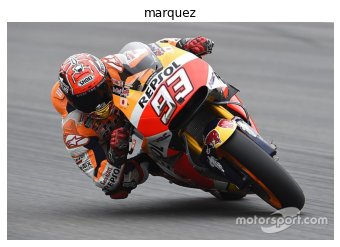

In [ ]:
img = view_random_image(target_dir='dataset_motogp/train/',
                        target_class='marquez')

# Data Loading

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(46)

# deklarasikan objek
train_datagen = ImageDataGenerator(rescale=1./255)
train_datagen_augmented = ImageDataGenerator(rescale=1./255,
                                             rotation_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)
valid_datagen = ImageDataGenerator(rescale=1./255)

# set direktori
train_dir = 'dataset_motogp/train/'
test_dir = 'dataset_motogp/test/'

# set data generator
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode='categorical',
                                               seed=46)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode='categorical',
                                               seed=46)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode='categorical',
                                               seed=46)

Found 403 images belonging to 6 classes.
Found 403 images belonging to 6 classes.
Found 51 images belonging to 6 classes.


In [ ]:
# modelling
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten

model = Sequential([
        Conv2D(8, 3, activation='selu', input_shape=(224, 224, 3)),
        Dropout(0.15),
        MaxPool2D(2),
        Conv2D(32, 3, activation='selu'),
        Dropout(0.15),
        MaxPool2D(2),
        Conv2D(32, 3, activation='selu'),
        Dropout(0.15),
        MaxPool2D(2),
        Flatten(),
        Dense(16, activation='relu'),
        Dense(6, activation='softmax')
])

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 222, 222, 8)       224       
                                                                 
 dropout_5 (Dropout)         (None, 222, 222, 8)       0         
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 111, 111, 8)      0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 109, 109, 32)      2336      
                                                                 
 dropout_6 (Dropout)         (None, 109, 109, 32)      0         
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 54, 54, 32)       0         
 g2D)                                                 

In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

history = model.fit(train_data_augmented,
                    epochs=30,
                    validation_data=valid_data)

Epoch 1/30
13/13 [==============================] - 23s 2s/step - loss: 2.0311 - accuracy: 0.1911 - val_loss: 2.4642 - val_accuracy: 0.1961
Epoch 2/30
13/13 [==============================] - 21s 2s/step - loss: 1.7691 - accuracy: 0.1663 - val_loss: 1.7043 - val_accuracy: 0.1961
Epoch 3/30
13/13 [==============================] - 21s 2s/step - loss: 1.7581 - accuracy: 0.2159 - val_loss: 1.7490 - val_accuracy: 0.2353
Epoch 4/30
13/13 [==============================] - 21s 2s/step - loss: 1.7626 - accuracy: 0.2283 - val_loss: 1.7520 - val_accuracy: 0.2745
Epoch 5/30
13/13 [==============================] - 21s 2s/step - loss: 1.7072 - accuracy: 0.2779 - val_loss: 1.8622 - val_accuracy: 0.2157
Epoch 6/30
13/13 [==============================] - 21s 2s/step - loss: 1.6487 - accuracy: 0.2953 - val_loss: 1.7259 - val_accuracy: 0.2157
Epoch 7/30
13/13 [==============================] - 21s 2s/step - loss: 1.6752 - accuracy: 0.2804 - val_loss: 1.6335 - val_accuracy: 0.2745
Epoch 8/30
13/13 [==

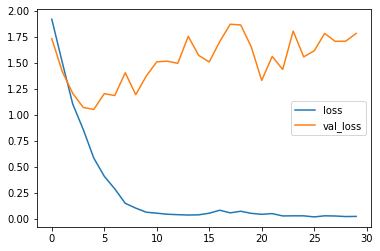

In [ ]:
import pandas as pd
metrics = pd.DataFrame(history.history)
metrics[['loss', 'val_loss']].plot()

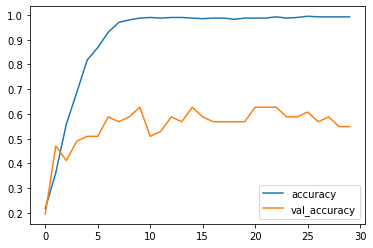

In [ ]:
metrics[['accuracy', 'val_accuracy']].plot()

In [ ]:
# inference
from google.colab import files

files.upload()


Saving 18373-marc-marquez.jpg to 18373-marc-marquez.jpg


{'18373-marc-marquez.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00`\x00`\x00\x00\xff\xfe\x00;CREATOR: gd-jpeg v1.0 (using IJG JPEG v62), quality = 80\n\xff\xdb\x00C\x00\x06\x04\x05\x06\x05\x04\x06\x06\x05\x06\x07\x07\x06\x08\n\x10\n\n\t\t\n\x14\x0e\x0f\x0c\x10\x17\x14\x18\x18\x17\x14\x16\x16\x1a\x1d%\x1f\x1a\x1b#\x1c\x16\x16 , #&\')*)\x19\x1f-0-(0%()(\xff\xdb\x00C\x01\x07\x07\x07\n\x08\n\x13\n\n\x13(\x1a\x16\x1a((((((((((((((((((((((((((((((((((((((((((((((((((\xff\xc2\x00\x11\x08\x01n\x02\x8d\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x00\x02\x03\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x05\x06\x04\x03\x07\x08\xff\xc4\x00\x1a\x01\x01\x00\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x03\x04\x02\x05\x06\xff\xda\x00\x0c\x03\x01\x00\x02\x10\x03\x10\x00\x00\x01\xfa\x82h\x00\x12\x92\x10\xd0\x86\x844!\xa1\r\x08h\x00B\x00I\x92I\xa0\x01 \x00\x00\x00\x00\x00\x10`\x000\x06\x00\x03\x00i\x8c\x00\x17$;N^\xa96\x98\x00\r0\x00\x01\x88\

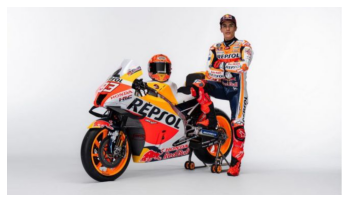

In [ ]:
new_img = mpimg.imread('18373-marc-marquez.jpg')
plt.imshow(new_img);
plt.axis(False);

In [ ]:
from tensorflow.io import read_file
from tensorflow.image import decode_image, resize

def load_and_preprocess(filename, img_shape=224):
  img = read_file(filename)
  img = decode_image(img, channels=3)
  img = resize(img, size=[img_shape, img_shape])
  img = img/255.
  return img

In [ ]:
new_img = load_and_preprocess('18373-marc-marquez.jpg')
new_img.shape

TensorShape([224, 224, 3])

In [ ]:
from tensorflow import expand_dims
# benerin dimensi
new_img = expand_dims(new_img, axis=0)
new_img.shape

TensorShape([1, 224, 224, 3])

In [ ]:
res = model.predict(new_img)
res.argmax()

4

In [ ]:
train_data.class_indices

{'dovizioso': 0,
 'lorenzo': 1,
 'marquez': 2,
 'pedrosa': 3,
 'rossi': 4,
 'vinales': 5}

# Transfer Learning

In [ ]:
# tentukan base model(ResNet)
from tensorflow.keras.applications import resnet_v2
base_model = resnet_v2.ResNet50V2(input_shape=(224, 224, 3),
                                  include_top=False,
                                  weights='imagenet')

94683136/94668760 [==============================] - 2s 0us/step


In [ ]:
from tensorflow.keras.layers import GlobalAveragePooling2D

model_tl = Sequential([
             base_model,
             GlobalAveragePooling2D(),
             Dropout(0.2),
             Dense(6, activation='softmax')
])

model_tl.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

history = model_tl.fit(train_data_augmented,
                    epochs=30,
                    validation_data=valid_data)

Epoch 1/30
13/13 [==============================] - 36s 2s/step - loss: 1.5094 - accuracy: 0.4020 - val_loss: 15.2192 - val_accuracy: 0.1961
Epoch 2/30
13/13 [==============================] - 24s 2s/step - loss: 0.9895 - accuracy: 0.5806 - val_loss: 17.0620 - val_accuracy: 0.2941
Epoch 3/30
13/13 [==============================] - 24s 2s/step - loss: 0.6928 - accuracy: 0.6998 - val_loss: 819.4689 - val_accuracy: 0.1765
Epoch 4/30
13/13 [==============================] - 25s 2s/step - loss: 0.6003 - accuracy: 0.7246 - val_loss: 41.1512 - val_accuracy: 0.4118
Epoch 5/30
13/13 [==============================] - 25s 2s/step - loss: 0.5249 - accuracy: 0.7841 - val_loss: 47.8498 - val_accuracy: 0.1961


KeyboardInterrupt: ignored